In [1]:
#imports
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
#drafting my cnn architecture
model = Sequential([

    # input layer
    Input(shape=(128, 128, 3)),   # (height, width, channels)

    # -------- Convolution Block 1 --------
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # -------- Convolution Block 2 --------
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # -------- Convolution Block 3 --------
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # -------- Fully Connected Layers --------
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    # -------- Output Layer --------
    Dense(11, activation='softmax')  # IRMAS = 11 instruments
])

In [3]:
#compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [4]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,059 (12.61 MB)

 Trainable params: 3,306,059 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [5]:
#dataset paths
DATASET_DIR = "/content/drive/MyDrive/irmas_mels"

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

In [6]:
#Create ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,        # normalize pixel values
    validation_split=0.2   # 80% train, 20% validation
)

In [7]:
#training data generator
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 5367 images belonging to 11 classes.


In [8]:
#validation data generator
val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1338 images belonging to 11 classes.


In [9]:
#train the model
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 2204s 13s/step - accuracy: 0.1352 - loss: 2.3698 - val_accuracy: 0.2212 - val_loss: 2.2156
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 29s 175ms/step - accuracy: 0.2006 - loss: 2.2577 - val_accuracy: 0.2840 - val_loss: 2.0999
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 30s 177ms/step - accuracy: 0.2560 - loss: 2.1431 - val_accuracy: 0.3401 - val_loss: 1.9966
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 34s 204ms/step - accuracy: 0.2967 - loss: 2.0616 - val_accuracy: 0.4357 - val_loss: 1.8593
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 29s 175ms/step - accuracy: 0.3293 - loss: 1.9938 - val_accuracy: 0.4245 - val_loss: 1.7916
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 30s 177ms/step - accuracy: 0.3427 - loss: 1.9527 - val_accuracy: 0.4589 - val_loss: 1.7502
Epoch 7/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 30s 181ms/step - accuracy: 0.3603 - loss: 1.9268 - val_accuracy: 0.4738 - val_loss: 1.6999
Epoch 8/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 29s 176ms/step - accuracy: 0.3964 - loss: 1

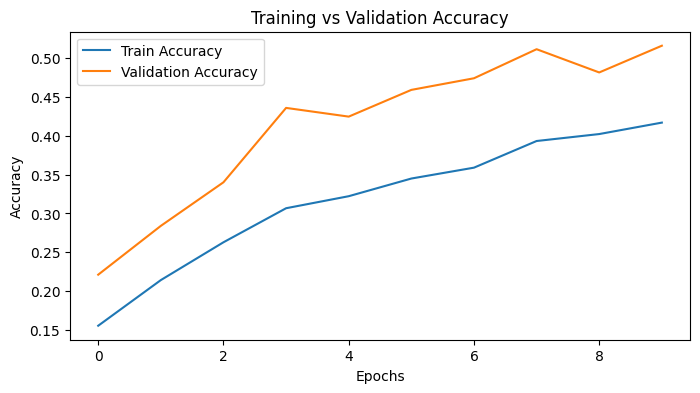

In [10]:
#Plot training & validation accuracy
plt.figure(figsize=(8,4))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [11]:
#saving the trained model
model.save("/content/drive/MyDrive/instrunet_cnn_model.h5")
print("✅ Model saved successfully")

✅ Model saved successfully
